In [1]:
import numpy as np

In [2]:
rate1 = 300
rate2 = 150
belt_speed = 300
box_width = 5.2
offset_1 = 0
offset_2 = 0
sample_1 = 1000
# sample_2 = 1000
zone_length = 4

In [3]:
def gap(rate, speed, width):
    return speed * 12 / rate - width

In [4]:
gap_1 = gap(rate1, belt_speed, box_width)
gap_2 = gap(rate2, belt_speed, box_width)
gap_1, gap_2

(6.8, 18.8)

In [5]:
def generate_coordinates(width, delta, sample, offset=0):
    x_array = []
    
    # initial points
    x = offset
    
    # generate x coordinate array of size sample
    for _ in range(sample):
        x_array.append(x)
        x += width + delta
        
    # y coordinates
    y_array = [x + width for x in x_array]
    
    return list(zip(x_array, y_array))

In [6]:
def generate_coordinates2(width, gap, boxes1, offset=0):
    x_array = []

    # initial points
    x = offset

    # generate x coordinates until boxes1 range is covered
    while x <= boxes1[-1][1]:
        x_array.append(x)
        x += width + gap

    # y coordinates
    y_array = [x + width for x in x_array]

    return list(zip(x_array, y_array))

In [7]:
boxes1 = generate_coordinates(box_width, gap_1, sample_1, offset_1)

In [8]:
boxes2 = generate_coordinates2(box_width, gap_2, boxes1, offset_2)

In [9]:
def compute_overlaps(boxes1, boxes2, zone_length):
    overlaps = [False for _ in boxes1]
    
    for i, box1 in enumerate(boxes1):
        for box2 in boxes2:
            
            # if box1 overlaps with box2
            if box1[0] - zone_length <= box2[1] and box2[0] - zone_length <= box1[1]:
                
                # add an overlap
                overlaps[i] = True
                
                # stop iteration (at least one overlap)
                break
    
    # return array of overlaps
    return overlaps

In [10]:
overlaps = compute_overlaps(boxes1, boxes2, zone_length)
len(boxes1) - sum(overlaps)

500

In [11]:
colors = []
for o in overlaps:
    if o:
        colors.append('tab:blue')
    else:
        colors.append('tab:orange')

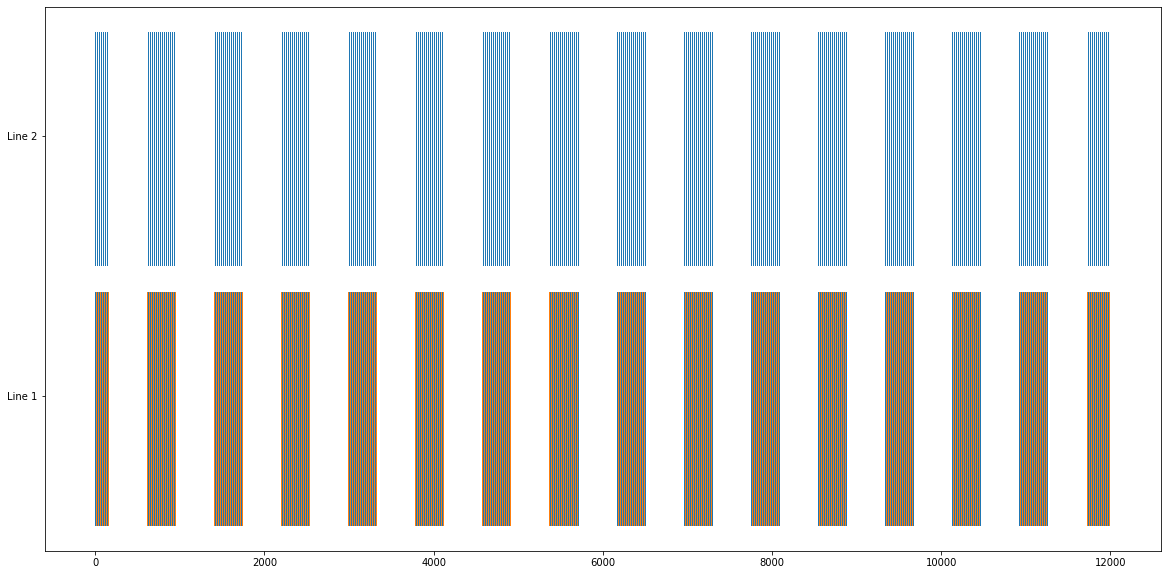

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.broken_barh([(box[0], box_width) for box in boxes1], (10, 9), facecolors=colors)
ax.broken_barh([(box[0], box_width) for box in boxes2], (20, 9), facecolors='tab:blue')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Line 1', 'Line 2'])

plt.show()

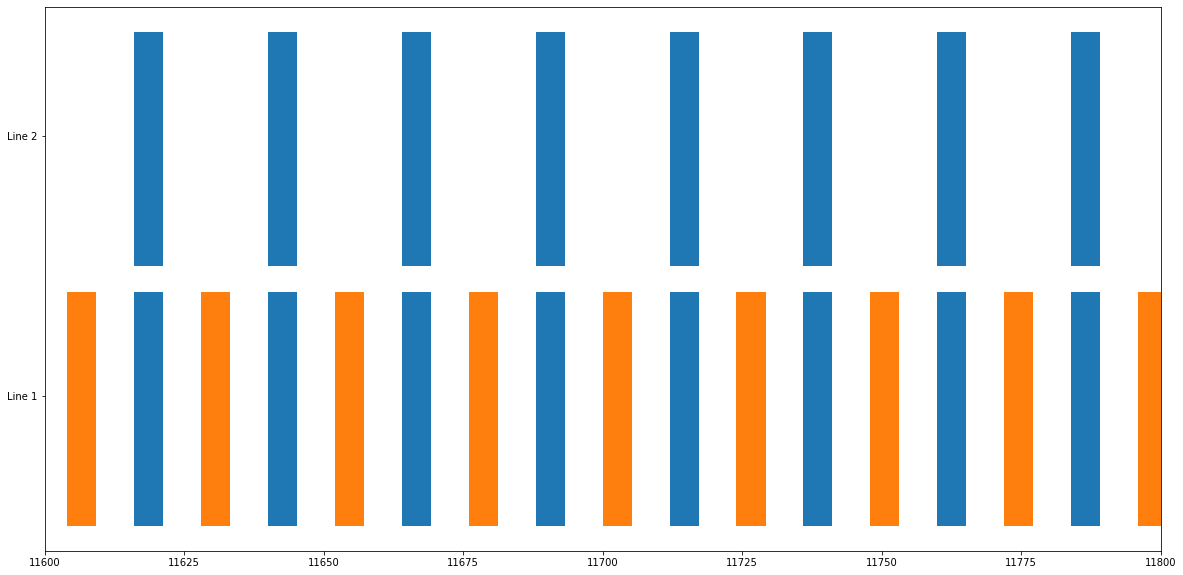

In [13]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.ioff()

fig, ax = plt.subplots(figsize=(20, 10))

ax.broken_barh([(box[0], box_width) for box in boxes1], (10, 9), facecolors=colors)
ax.broken_barh([(box[0], box_width) for box in boxes2], (20, 9), facecolors='tab:blue')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Line 1', 'Line 2'])

xrange = np.arange(0, max(boxes1[-1][1], boxes2[-1][1]), 200)

def animate(t):
    plt.xlim(xrange[t], xrange[t+1])

matplotlib.animation.FuncAnimation(fig, animate, frames=len(xrange)-1)